# ทดสอบการสร้างโมเดล regression machine learning จากข้อมูล 160 km
* simple linear
* multiple linear
* polynomial

In [1]:
'''
2024/01/09 
พัฒนาโค้ดโดย รศ.ดร.นัฐพล มหาวิค 
email:nattaponm@nu.ac.th 
ยูทูป:https://www.youtube.com/@Nattapon_Mahavik/playlists 
หนังสือ: เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา https://www.chulabook.com/education/144567
Github: https://github.com/nattaponm
Scopus: https://www.scopus.com/authid/detail.uri?authorId=55583236600
'''

'\n2024/01/09 \nพัฒนาโค้ดโดย รศ.ดร.นัฐพล มหาวิค \nemail:nattaponm@nu.ac.th \nยูทูป:https://www.youtube.com/@Nattapon_Mahavik/playlists \nหนังสือ: เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา https://www.chulabook.com/education/144567\nGithub: https://github.com/nattaponm\nScopus: https://www.scopus.com/authid/detail.uri?authorId=55583236600\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## read & data cleansing

In [3]:
df = pd.read_csv('../2results/df_org_dbz_rain_test160km_full_features.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
df

,dBZ_c1,dBZ_c2,dBZ_c3,dBZ_c4,dBZ_p1,dBZ_p2,dBZ_p3,dBZ_p4,rain_intensity,rr_MP_c1,...,rr_RF_p4,rr_SC_c1,rr_SC_c2,rr_SC_c3,rr_SC_c4,rr_SC_p1,rr_SC_p2,rr_SC_p3,rr_SC_p4,rain_truth
0,21.600323,21.651548,21.254112,20.689474,22.848606,21.651548,17.299454,16.509392,Slight,0.594845,...,0.126940,0.359812,0.365803,0.321815,0.268260,0.538065,0.365803,0.089940,0.069718,0.4
1,20.832413,19.653109,19.943129,20.224384,20.718672,21.813087,19.654741,20.150036,Moderate,0.448268,...,0.347117,0.280911,0.192073,0.210896,0.230911,0.270797,0.385356,0.192174,0.225442,5.8
2,30.103109,30.241182,29.542423,27.825153,28.139114,32.976849,29.036983,19.397022,Slight,13.641104,...,0.281913,5.577834,5.831708,4.655534,2.676404,2.961463,14.086044,3.955560,0.176853,0.4
3,16.882086,18.167044,19.741882,19.767611,16.245510,13.865370,14.419718,18.167044,Slight,0.104589,...,0.200686,0.078618,0.118964,0.197649,0.199295,0.064033,0.029729,0.035546,0.118964,0.4
4,26.769304,26.772455,26.795412,26.697132,22.814074,28.619864,26.118504,26.813993,Slight,3.994300,...,2.188523,1.904289,1.906224,1.920383,1.860496,0.532109,3.457890,1.543906,1.931921,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,12.722622,12.673051,12.329172,9.504724,18.879297,14.405016,5.796728,1.051790,Slight,0.022593,...,0.001773,0.020568,0.020242,0.018118,0.007289,0.149669,0.035378,0.002206,0.000478,0.2
111,29.812841,29.625065,29.498009,29.461802,30.760672,29.536051,29.301682,29.194805,Slight,12.257634,...,4.225213,5.079583,4.781227,4.589353,4.536098,6.894841,4.645980,4.307900,4.162009,0.6
112,16.299009,16.412868,16.471737,16.398716,18.608812,16.959469,15.822438,17.097704,Slight,0.084371,...,0.149347,0.065147,0.067582,0.068877,0.067275,0.137172,0.080604,0.055869,0.084277,0.2
113,29.879730,29.846922,29.810345,29.795416,30.060654,29.911350,29.760616,29.700960,Slight,12.563448,...,4.859451,5.190300,5.135696,5.075496,5.051129,5.502015,5.243476,4.994782,4.899646,0.2


In [5]:
#df_ = df.drop(df.loc[:, 'rr_MP_c1':'rr_SC_p4'].columns, axis=1) #ลบคอลัมน์
#df_

## Data visualization 

### correlation matrix

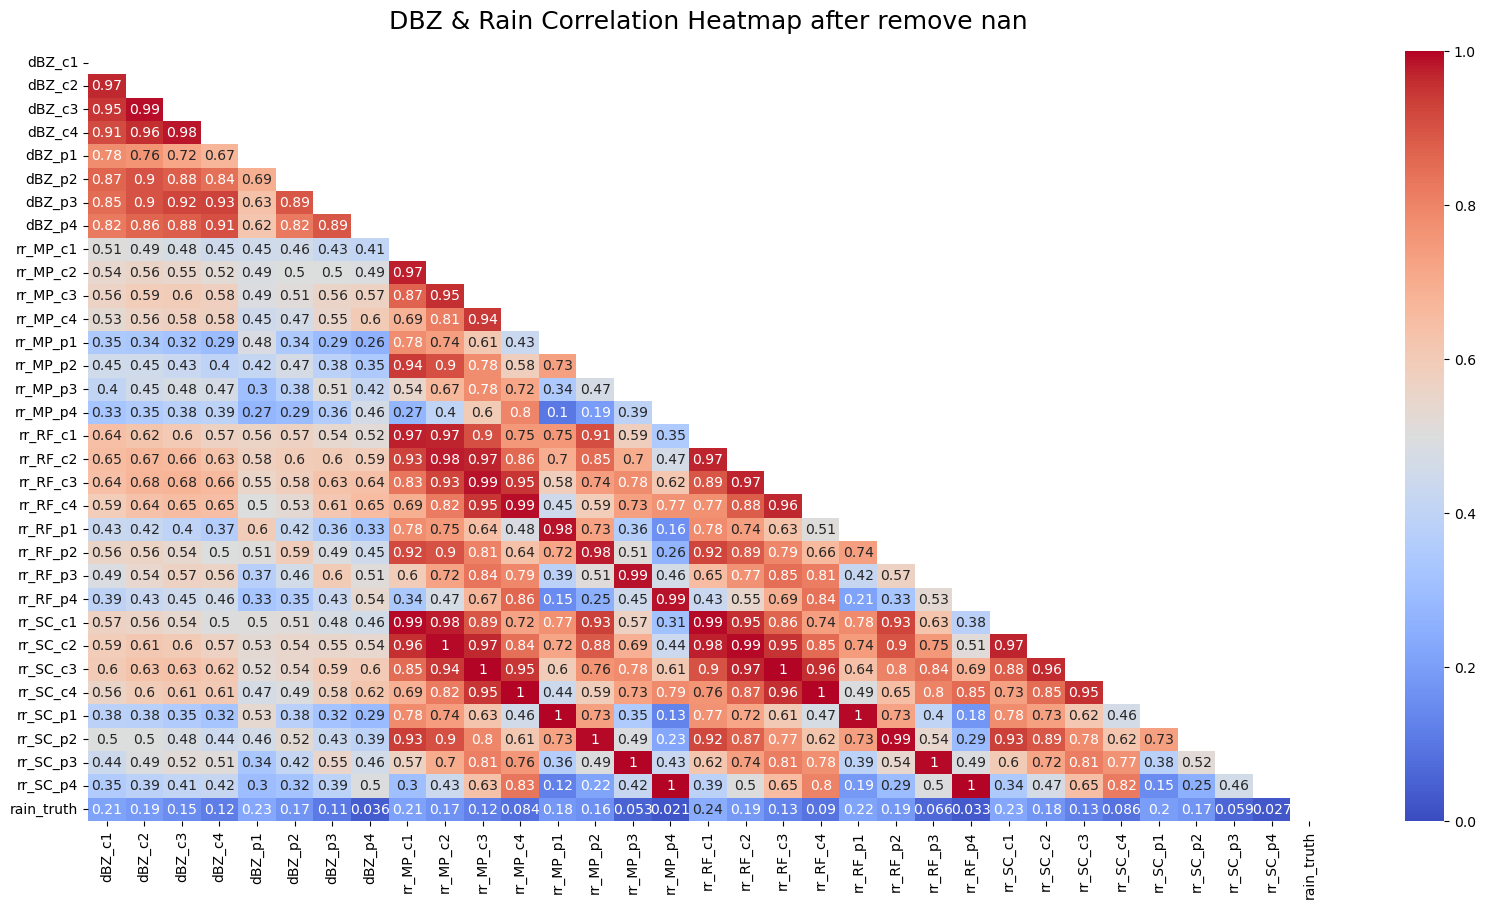

In [6]:
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('DBZ & Rain Correlation Heatmap after remove nan', fontdict={'fontsize':18}, pad=16);

### pair plot

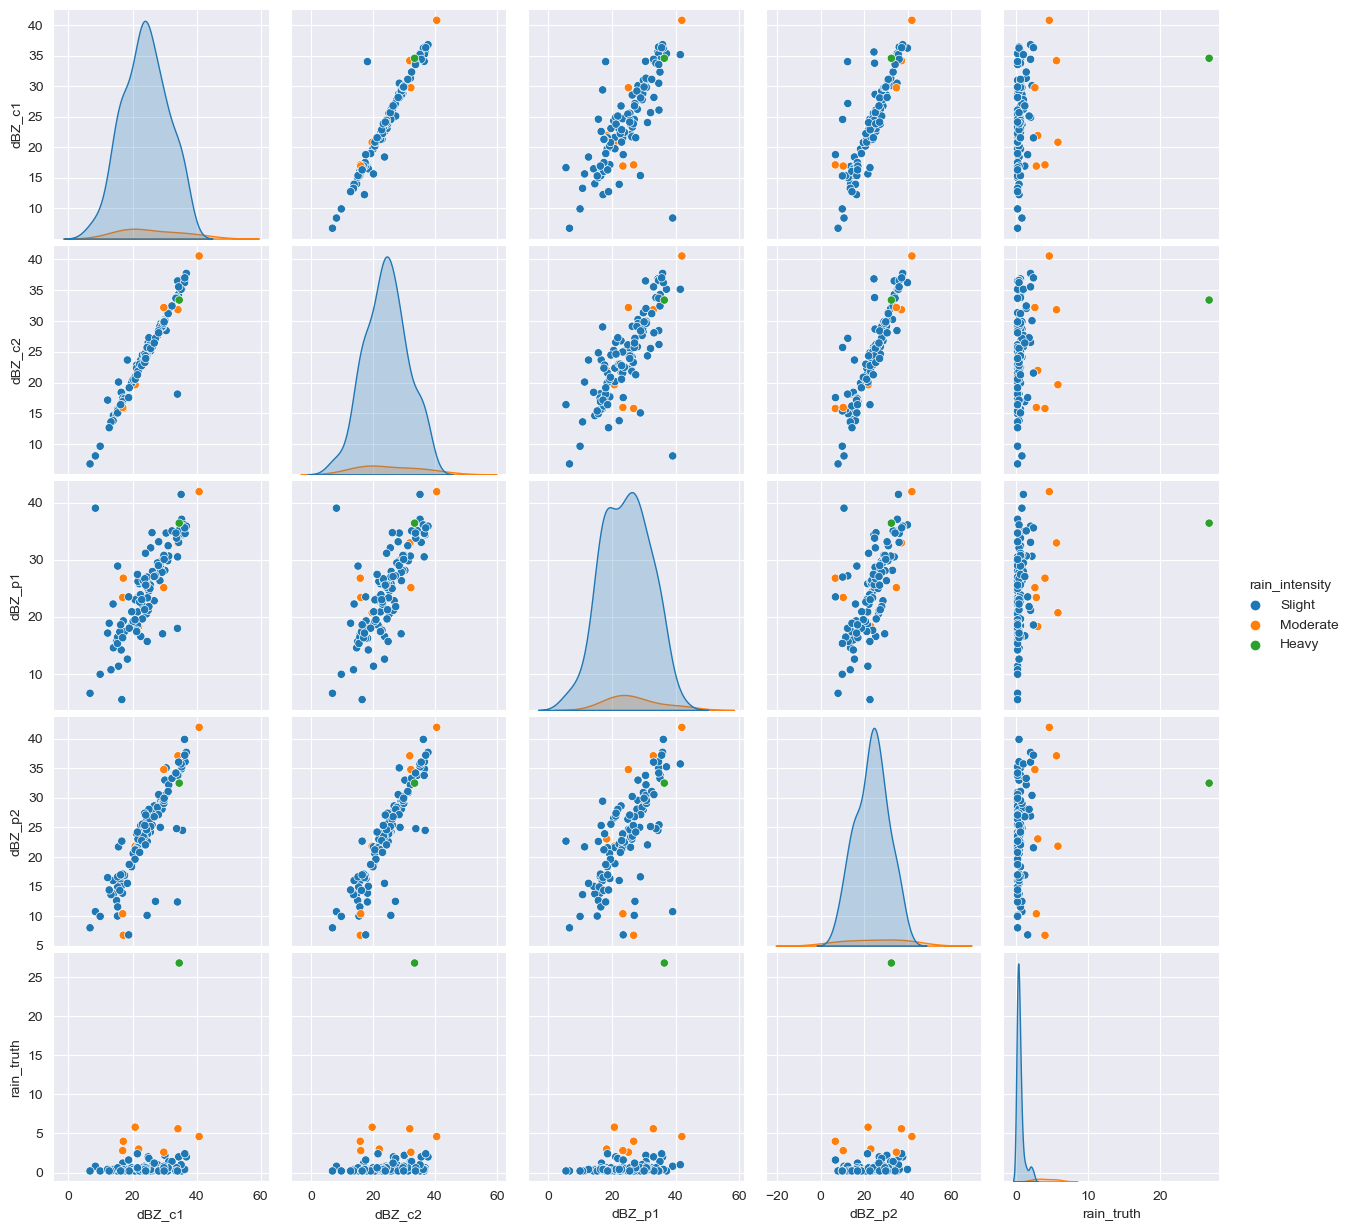

In [7]:
cols_to_plot = ['dBZ_c1', 'dBZ_c2', 'dBZ_p1', 'dBZ_p2', 'rain_truth','rain_intensity']
sns.set_style({'font.family':'Tahoma'})
#sns.set(font_scale=2.5)
sns.set_style('darkgrid')
pplot=sns.pairplot(df[cols_to_plot], hue='rain_intensity')

### box plot

[Text(0.5, 0, 'Rain intensity WMO'), Text(0, 0.5, 'Cappi 1km (dBZ)')]

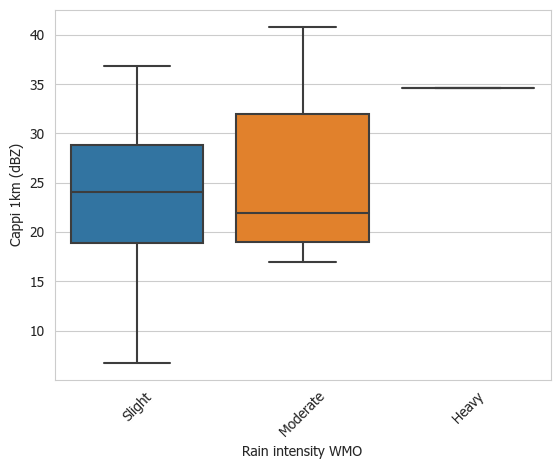

In [8]:
sns.set_style("whitegrid")   
sns.set_style({'font.family':'Tahoma'})
bbplot=sns.boxplot(x ='rain_intensity' , y = 'dBZ_c1', data = df) 
bbplot.set_xticklabels(bbplot.get_xticklabels(), rotation=45)
bbplot.set(xlabel='Rain intensity WMO',  ylabel='Cappi 1km (dBZ)')

[Text(0.5, 0, 'Rain intensity WMO'), Text(0, 0.5, 'Cappi 2km (dBZ)')]

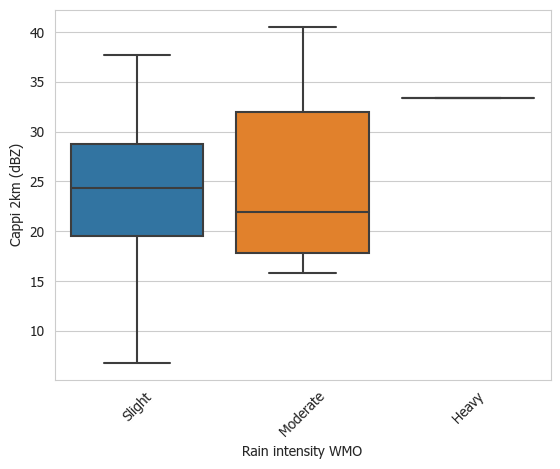

In [9]:
sns.set_style("whitegrid")   
sns.set_style({'font.family':'Tahoma'})
bbplot=sns.boxplot(x ='rain_intensity' , y = 'dBZ_c2', data = df) 
bbplot.set_xticklabels(bbplot.get_xticklabels(), rotation=45)
bbplot.set(xlabel='Rain intensity WMO',  ylabel='Cappi 2km (dBZ)')

# Machine Learning
https://www.educative.io/blog/machine-learning-regression-models-with-python

## Linear regression

In [10]:
# Step 1: Importing libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Step 2: Defining the columns and reading the DataFrame 
TargetVariable=['rain_truth']
Predictors=['dBZ_c1']
 
# Step 3: Seperating the data into features and labels
X=df[Predictors].values
y=df[TargetVariable].values

# Step 4: Dividing the dataset into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

# Step 5: Selecting the linear regression method from the scikit-learn library
model = LinearRegression().fit(X_train, y_train)

# Step 6: Validation
# Evaluating the trained model on training data
y_prediction = model.predict(X_train)
print("MAE on train data= " , metrics.mean_absolute_error(y_train, y_prediction))
# Evaluating the trained model on test data
y_prediction = model.predict(X_test)
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_prediction))
r2 = metrics.r2_score(y_test, y_prediction)
print("R2:", r2)

MAE on train data=  0.9180581040754419
MAE on test data =  1.031712276761371
R2: -0.02573094203877635


## Multiple linear regression

In [11]:
# Step 1: Importing libraries 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Step 2: Defining the columns and reading the DataFrame 
TargetVariable=['rain_truth']
Predictors=['dBZ_c1', 'dBZ_c2', 'dBZ_p1', 'dBZ_p2']
 
# Step 3: Seperating the data into features and labels
X=df[Predictors].values
y=df[TargetVariable].values

# Step 4: Dividing the dataset into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

# Step 5: Selecting the linear regression method from the scikit-learn library
model = LinearRegression().fit(X_train, y_train)

# Step 6: Validation
# Evaluating the trained model on training data
y_prediction = model.predict(X_train)
print("MAE on train data= " , metrics.mean_absolute_error(y_train, y_prediction))
# Evaluating the trained model on test data
y_prediction = model.predict(X_test)
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_prediction))
r2 = metrics.r2_score(y_test, y_prediction)
print("R2:", r2)

MAE on train data=  1.0235969103330007
MAE on test data =  1.2388013283391899
R2: -0.6862420347162987


## Polynomial regression

In [12]:
# Step 1: Importing libraries 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

# Step 2: Defining the columns and reading the DataFrame 
TargetVariable=['rain_truth']
Predictors=['dBZ_c1', 'dBZ_c2', 'dBZ_p1', 'dBZ_p2']
 
# Step 3: Seperating the data into features and labels
X=df[Predictors].values
y=df[TargetVariable].values

# Step 4: Generating polynomial features 
Z = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
# Dividing the dataset into test and train data
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=10)

# Step 5: Selecting the linear regression method from the scikit-learn library
model = LinearRegression().fit(X_train, y_train)

# Step 6: Validation
# Evaluating the trained model on training data
y_prediction = model.predict(X_train)
print("MAE on train data= " , metrics.mean_absolute_error(y_train, y_prediction))
# Evaluating our trained model on test data
y_prediction = model.predict(X_test)
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_prediction))
r2 = metrics.r2_score(y_test, y_prediction)
print("R2:", r2)

MAE on train data=  1.3414733137215955
MAE on test data =  11.25464772380393
R2: -785.6636796582147


## ทดสอบ
* ให้เพิ่มจำนวนฟีเจอร์
* หาว่าฟีเจอร์ไหนควรนำมาสร้างแบบจำลอง
* ศึกษาและทดสอบ k-fold ให้ลองทำ 5 ครั้ง
* 

# implement model Deep learning ANN ยังไม่สมบูรณ์ สามารถนำไปสร้างต่อใน colab ได้
DL ANN ต้องมีเรคคอร์ด>50K
https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/

In [ ]:
TargetVariable=['rain_truth']
Predictors=['dBZ_c1', 'dBZ_c2', 'dBZ_p1', 'dBZ_p2']
 
X=df[Predictors].values
y=df[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# ต้องไปทำใน Colab เพราะติดตั้ง tensorflow + keras ได้ง่ายกว่า

# Next 
* ลองเล่น ML basic ของ microsoft https://github.com/MicrosoftDocs/ml-basics/blob/master/02%20-%20Regression.ipynb